# **MÓDULO 20 - Projeto de Credit Score - Naive Bayes**


No módulo 17 vocês realizaram a primeira etapa do projeto de crédito de vocês.
Então fizeram o tratamendo dos dados, balancearam as classes, transformaram as variáveis categóricas e separam base de treino e teste.
Nessa aula aplicaremos o algoritmo de naive bayes a base de vocês afim de tentarmos trazer previsões do score de crédito.

**IMPORTANTE:** Não se esqueçam de ao enviar o código de vocês para os tutores, enviarem as bases, pois como cada um de vocês realizou as alterações de tratamento indidualmente o tutor precisa ter acesso aos seus dados individuais.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import plotly.figure_factory as ff

Durante a aula nossa variável a ser prevista (churn) continha apenas 2 categorias, a base de vocês contém mais. O Naive Bayes pode ser aplicado para problemas de classificação com múltiplas classes da mesma forma que para problemas de classificação binária. O Naive Bayes é um algoritmo de classificação probabilístico que calcula a probabilidade de uma amostra pertencer a cada classe e seleciona a classe com a maior probabilidade como a previsão final.
Em resumo, o Naive Bayes pode ser aplicado da mesma maneira para problemas de classificação com múltiplas classes, e os mesmos princípios se aplicam em termos de treinamento, avaliação e aplicação do modelo.

# 1) Comece carregando as bases de treino (X e y) e teste (X e y).
Verifique se o número de linhas condiz, se as variáveis estão corretas sendo apenas a de score para y e as demais nas bases de X e por último, se Y está balanceada no teste.

In [2]:
x_test = pd.read_csv('x_test_balanced.csv', delimiter=',')
y_test = pd.read_csv('y_test_balanced.csv', delimiter=',')
x_train = pd.read_csv('x_train_balanced.csv', delimiter=',')
y_train = pd.read_csv('y_train_balanced.csv', delimiter=',')

In [3]:
print('Tamanho base x_test:', x_test.shape)
print('Tamanho base y_test:', y_test.shape)
print('Tamanho base x_train:', x_train.shape)
print('Tamanho base y_train:', y_train.shape)

Tamanho base x_test: (41, 10)
Tamanho base y_test: (41, 1)
Tamanho base x_train: (252, 10)
Tamanho base y_train: (252, 1)


In [4]:
x_test

,Age,Income,Number of Children,Gender_encoded,Marital_Status_encoded,Home_Ownership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,25.0,55000.0,0,0,1,1,True,False,False,False
1,48.0,87500.0,1,0,0,0,False,True,False,False
2,26.0,55000.0,1,0,0,0,True,False,False,False
3,39.0,62500.0,2,0,0,0,True,False,False,False
4,35.0,90000.0,1,0,0,0,False,True,False,False
5,25.0,55000.0,0,0,1,1,True,False,False,False
6,48.0,82500.0,1,0,0,0,False,True,False,False
7,48.0,82500.0,1,0,0,0,False,True,False,False
8,36.0,95000.0,2,0,0,0,False,False,False,True
9,36.0,95000.0,1,0,0,0,False,False,True,False


In [5]:
y_test

,Credit_Score_encoded
0,1.0
1,2.0
2,1.0
3,2.0
4,2.0
5,1.0
6,2.0
7,2.0
8,2.0
9,2.0


In [6]:
x_train

,Age,Income,Number of Children,Gender_encoded,Marital_Status_encoded,Home_Ownership_encoded,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree
0,26.000000,45000.000000,0,0,1,1,False,False,False,False
1,29.000000,27500.000000,0,0,1,1,False,False,True,False
2,25.000000,62500.000000,0,0,1,1,True,False,False,False
3,29.000000,68000.000000,2,0,0,0,False,True,False,False
4,31.000000,65000.000000,0,1,1,1,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
247,29.950365,43703.466973,0,0,1,1,False,False,False,False
248,34.000000,47500.000000,0,1,1,1,False,False,False,False
249,29.702951,57500.000000,0,0,1,1,True,False,False,False
250,25.000000,60063.547817,0,0,1,1,True,False,False,False


In [7]:
y_train

,Credit_Score_encoded
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
247,1.0
248,1.0
249,1.0
250,1.0


In [8]:
print('Distribuição das classes após balanceamento:\n', y_train.value_counts(). sort_index())

Distribuição das classes após balanceamento:
 Credit_Score_encoded
0.0                     84
1.0                     84
2.0                     84
Name: count, dtype: int64


In [9]:
print('Distribuição das classes na base de teste:\n', y_test.value_counts(). sort_index())

Distribuição das classes na base de teste:
 Credit_Score_encoded
0.0                      6
1.0                      6
2.0                     29
Name: count, dtype: int64


A base de treino foi balanceada com o objetivo de melhorar o aprendizado do modelo. Já a base de teste foi mantida desbalanceada, pois representa uma situação mais próxima a realidade, permitindo assim uma avaliação do desempenho do modelo.  
  
**Observação:**   
Os dados da variável **Credit_Score_encoded** foram transformados, ficando da seguinte forma suas correspondencias:
- 0 : Low
- 1 : Average
- 2 : High

# 2) Aplique o algoritmo de Naive Bayes aos dados de treinamento.

In [10]:
naive_score = GaussianNB()
naive_score.fit(x_train, y_train)

C:\Users\Mylla\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



,priors,None
,var_smoothing,1e-09


# 3) Faça a avaliação do modelo com os dados de treinamento.
Traga a acurácia, recall e plote a matriz de confusão. Não se esqueça de avaliar com suas palavras o desempenho do modelo, interpretando as métricas.

Dica: Para calcularmos o recall em classificação multi classe precisamos usar o atributo macro:
recall = recall_score(y_train, y_pred_train, average='macro')

In [11]:
y_pred_train = naive_score.predict(x_train)

In [12]:
accuracy = accuracy_score(y_train, y_pred_train)
print("Acurácia:", accuracy)

Acurácia: 0.9801587301587301


In [13]:
recall = recall_score(y_train, y_pred_train, average='macro')
print("Recall:", recall)

Recall: 0.9801587301587302


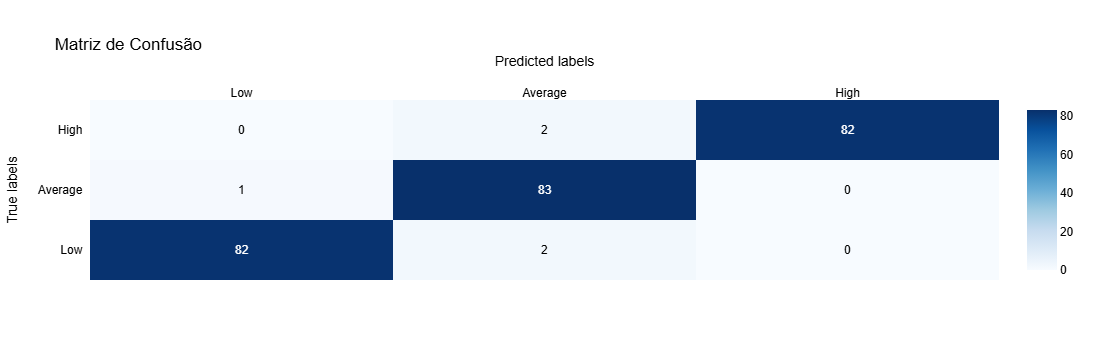

In [18]:
conf_matrix = confusion_matrix(y_train, y_pred_train)

# Definindo  nomes de classes
class_names = ['Low', 'Average', 'High']

# Plotando a matriz de confusão com Plotly
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predicted labels',
    yaxis_title='True labels',
    font=dict(
        family='Arial',
        size=12,
        color='black'
    )
)

O modelo Naive Bayes apresentou um desempenho muito elevado na base de treino, alcançando valores de acurácia e recall de 0.98.  
A análise da matriz de confusão mostra que foram poucos os casos de erro, os quais se concentram principalmente na classe **Average**, indicando maior dificuldade do modelo em distinguir essa categoria em relação às demais.


# 4) Aplique o modelo aos dados de teste e realize a avaliação dos resultados, da mesma forma que fez acima. Não se esqueça de avaliar com as suas palavras e comparar o desempenho da base treino com a teste.

In [15]:
y_pred_test = naive_score.predict(x_test)

In [16]:
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test, average='macro')


print("Acurácia:", accuracy)
print("Recall:", recall)

Acurácia: 1.0
Recall: 1.0


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred_test)

# Definindo  nomes de classes
class_names = ['0', '1', '2']

# Plotando a matriz de confusão com Plotly
fig = ff.create_annotated_heatmap(
    z=conf_matrix,
    x=class_names,
    y=class_names,
    colorscale='Blues',
    showscale=True
)
fig.update_layout(
    title='Matriz de Confusão',
    xaxis_title='Predicted labels',
    yaxis_title='True labels',
    font=dict(
        family='Arial',
        size=12,
        color='black'
    )
)

Ao aplicar o modelo na base de teste, foram obtidos valores de acurácia e recall iguais a 1.0, indicando que todas as observações foram corretamente classificadas quanto ao score de crédito.  

Mesmo com a base de teste desbalanceada, o modelo manteve um desempenho excelente, o que sugere uma boa capacidade de generalização para esse conjunto de dados. 


# 5) Descreva com suas palavras o projeto desenvolvido nessa atividade e qual o nosso objetivo principal ao aplicarmos o algoritmo de naive bayes a base de crédito.
Utilize pelo menos 4 linhas.

Dica: Caso você ainda esteja tendo dificuldade em visualizar a aplicação dos projetos e objetivo, consulte seus tutores!

O projeto de criação do modelo para previsão do Score de Crédito teve início em atividades práticas anteriores, a partir do tratamento da base de dados. Nessa etapa, foram realizadas a limpeza dos dados e a verificação de valores nulos.  

Em seguida, foi conduzida a análise exploratória dos dados, iniciando-se pela análise univariada das variáveis numéricas e, posteriormente, pela análise bivariada envolvendo as variáveis categóricas. Essa etapa permitiu identificar quais variáveis apresentavam maior ou menor relação entre si.  

Por fim, os dados foram divididos em bases de treino e teste, utilizando a proporção de 75% para treino e 25% para teste, e o modelo foi treinado utilizando o algoritmo Naive Bayes.  

Todo esse processo — desde o tratamento dos dados, passando pela análise exploratória, até a aplicação do algoritmo — teve como objetivo a construção de um modelo capaz de predizer o Score de Crédito de um cliente com base nas demais variáveis disponíveis.
